In [2]:
import dill
import gym

100%|██████████| 200000/200000 [00:25<00:00, 7761.92it/s]


[[0.49303214 0.38212845 0.38600962 0.38372627]
 [0.26334453 0.26173942 0.25780121 0.38752093]
 [0.35743787 0.35672988 0.35693158 0.36466693]
 [0.30871582 0.29577102 0.31628241 0.35753175]
 [0.50923218 0.28570542 0.27886274 0.27011676]
 [0.         0.         0.         0.        ]
 [0.30357965 0.30029328 0.30011644 0.26248489]
 [0.         0.         0.         0.        ]
 [0.28971753 0.32466509 0.30244099 0.54249715]
 [0.42010645 0.59719792 0.42948881 0.38554291]
 [0.57155457 0.52525462 0.45643776 0.42744282]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.45005035 0.54116133 0.70448664 0.50408809]
 [0.72574548 0.83993268 0.79606355 0.77750858]
 [0.         0.         0.         0.        ]]


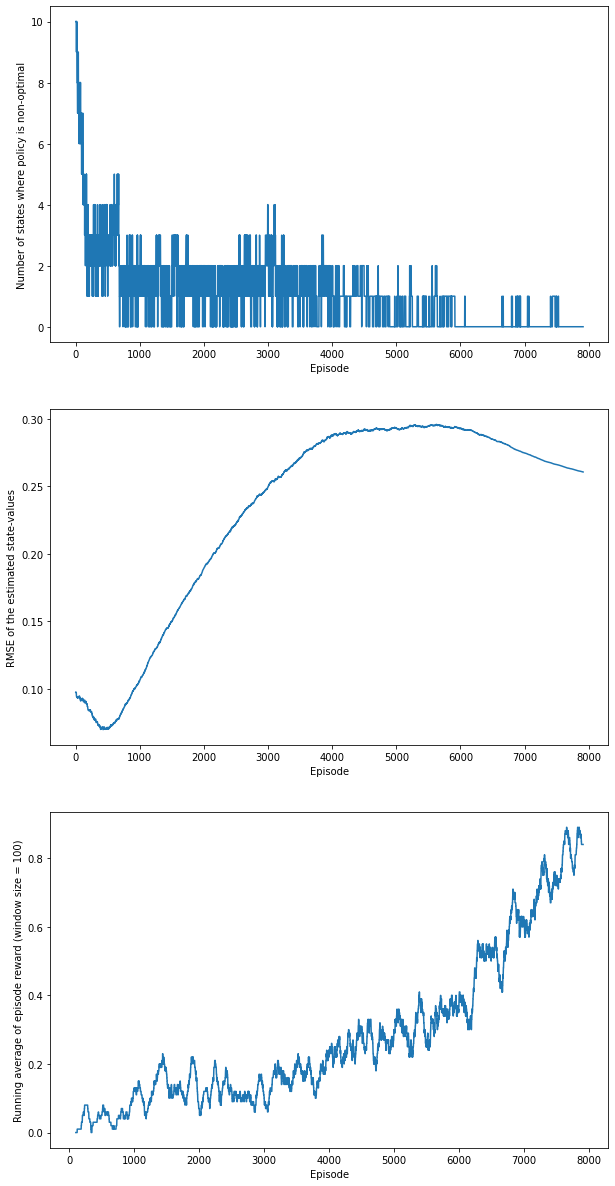

In [7]:
%run sarsa_training.py 4 200000


100%|██████████| 200000/200000 [00:45<00:00, 4423.53it/s]


[[0.809488   0.80874865 0.80876301 0.80837022]
 [0.53142863 0.5447552  0.45333402 0.80752187]
 [0.71598675 0.71756395 0.718912   0.80612939]
 [0.46580751 0.55228868 0.53089415 0.80545393]
 [0.81075882 0.47747438 0.49947761 0.55577393]
 [0.         0.         0.         0.        ]
 [0.52548179 0.18408745 0.5381976  0.28442087]
 [0.         0.         0.         0.        ]
 [0.49925015 0.53986696 0.51130636 0.81226963]
 [0.53385425 0.81163738 0.43931666 0.48064352]
 [0.74821368 0.53810713 0.45107274 0.41715593]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.46243748 0.59682755 0.87588067 0.62035774]
 [0.84943613 0.93543615 0.89597561 0.88230313]
 [0.         0.         0.         0.        ]]


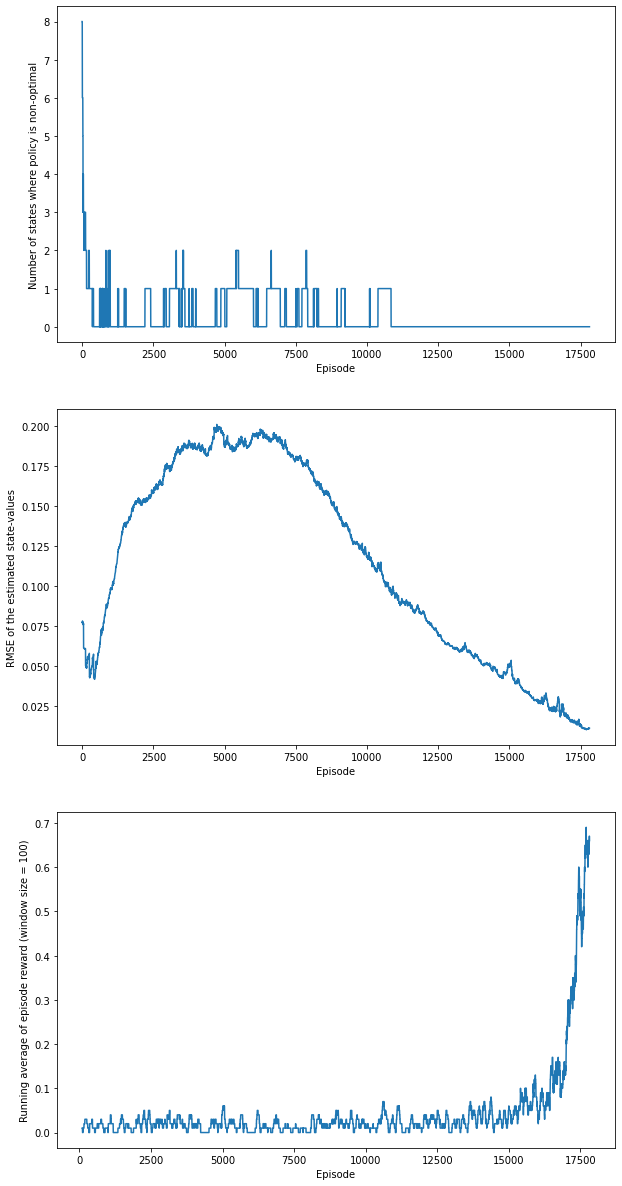

In [1]:
%run expected_sarsa_training.py 4 200000

100%|██████████| 200000/200000 [00:25<00:00, 7866.44it/s]


[[0.79947973 0.79343144 0.79346018 0.79328802]
 [0.52075877 0.51971642 0.52055506 0.78187191]
 [0.69820571 0.69478564 0.67978725 0.76788527]
 [0.51999112 0.50140259 0.5060054  0.75767886]
 [0.79989041 0.52296153 0.54727867 0.53003428]
 [0.         0.         0.         0.        ]
 [0.51351678 0.27275071 0.53298917 0.22721414]
 [0.         0.         0.         0.        ]
 [0.53806335 0.53631148 0.53678292 0.80153276]
 [0.53027093 0.80555073 0.53446851 0.51101804]
 [0.76382483 0.60026067 0.48208501 0.46429132]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.57768887 0.59339042 0.86036314 0.56970156]
 [0.83572524 0.92164202 0.90283143 0.85486104]
 [0.         0.         0.         0.        ]]


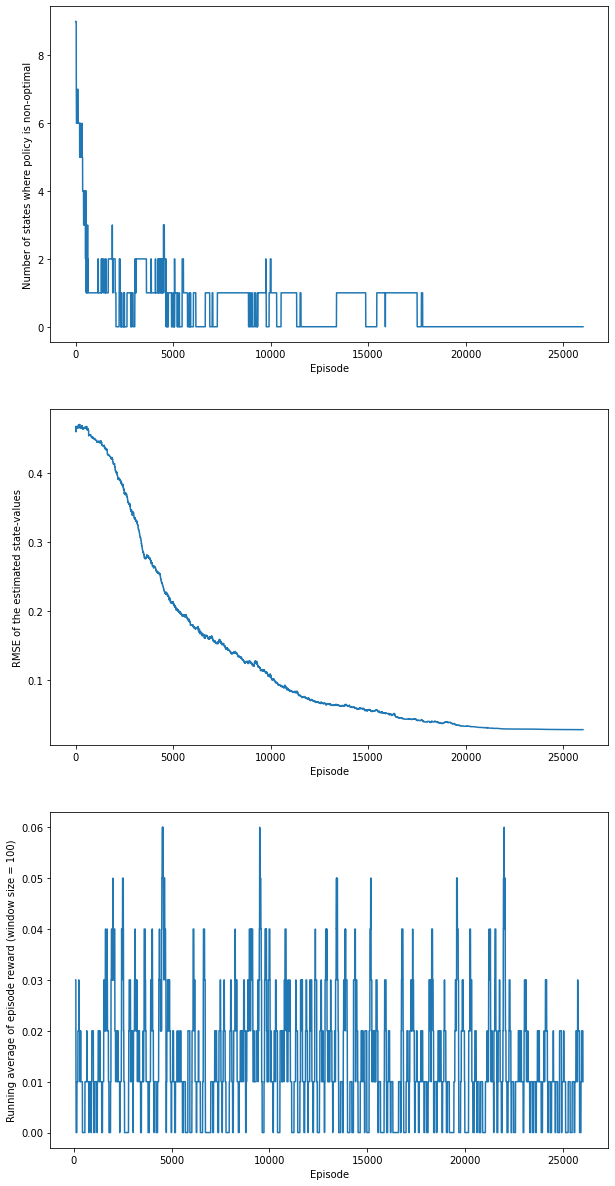

In [9]:
%run q_learning_training.py 4 200000

100%|██████████| 200000/200000 [00:27<00:00, 7259.96it/s]


[[0.83370503 0.83353553 0.83353094 0.83355539]
 [0.54041257 0.578423   0.55149659 0.83302655]
 [0.72854963 0.74119691 0.74351773 0.83239621]
 [0.54829949 0.5756454  0.54386271 0.8320579 ]
 [0.83364095 0.5744581  0.57028362 0.58444273]
 [0.         0.         0.         0.        ]
 [0.55343897 0.22456468 0.47097828 0.2226077 ]
 [0.         0.         0.         0.        ]
 [0.56978004 0.5498806  0.54910544 0.83350168]
 [0.57159341 0.83356929 0.52738558 0.50517659]
 [0.77241995 0.55607643 0.48899406 0.48854908]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.57338704 0.60599527 0.88965427 0.55071822]
 [0.86853841 0.94623146 0.91250006 0.88827037]
 [0.         0.         0.         0.        ]]


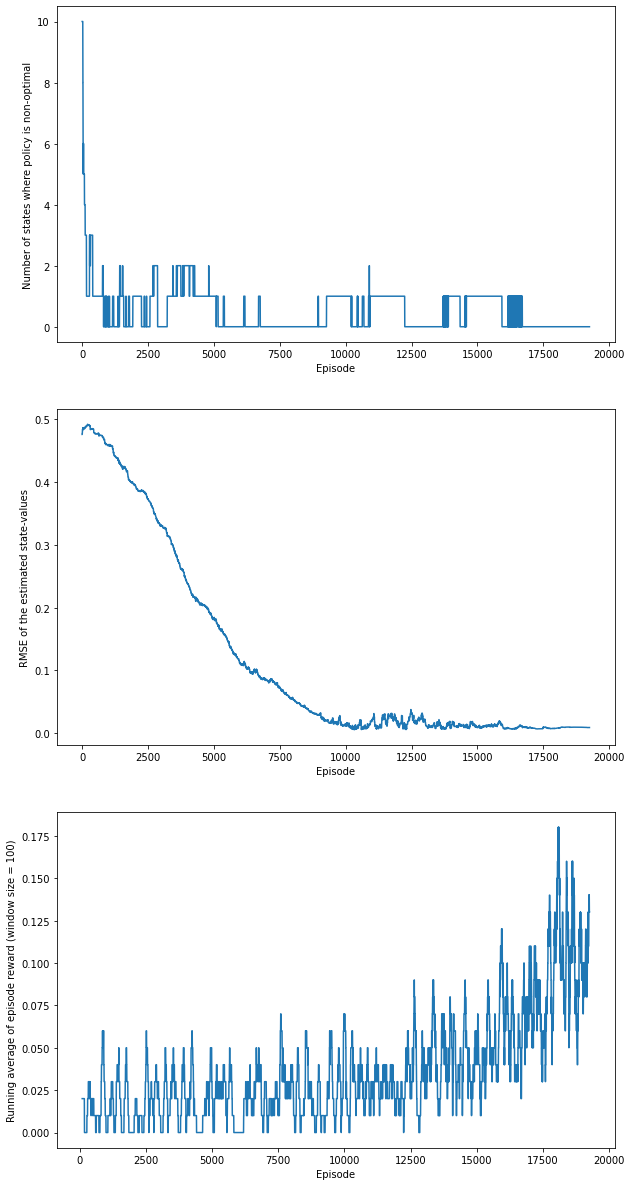

In [11]:
%run q_learning_eps_training.py 4 200000

In [3]:
# Fetch the agents that resulted from training in inference mode:
agents= {}
for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    with open(f'{alg}_agent.dill', 'rb') as fopen:
        agents[alg] = dill.load(fopen)
    agents[alg].set_mode('inference')

In [4]:
map_size = int(agents['sarsa'].env.observation_space.n **(1/2))

if map_size == 4:
    map_name = '4x4'
elif map_size == 8:
    map_name = '8x8'

env = gym.make('FrozenLake-v1', desc=None, map_name=map_name, is_slippery=True)
env._max_episode_steps = 10000

In [5]:
average_reward_per_episode = {}

for alg in ('sarsa', 'expected_sarsa', 'q_learning', 'q_learning_eps'):
    episodes = 0
    total_reward = 0
    observation = env.reset()
    while episodes < 10000:
        action = agents[alg].get_action(observation)
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            observation = env.reset()
            episodes += 1

    average_reward_per_episode[alg] = total_reward / episodes

env.close()

In [6]:
average_reward_per_episode

{'sarsa': 0.8195,
 'expected_sarsa': 0.8255,
 'q_learning': 0.822,
 'q_learning_eps': 0.8236}